Импорт необходимых библиотек для анализа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Загрузка данных

In [2]:
df = pd.read_csv('diabetes_data.csv')

In [3]:
df

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-12-26,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,17.357712
996,997,2023-12-27,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,73.000000
997,998,2023-12-28,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,70.921787
998,999,2023-12-29,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,10.000000


Переименование столбцов для лучшей читаемости

In [4]:
df = df.rename(columns={'blood_glucose': 'glucose',
                        'physical_activity': 'sport',
                        'medication_adherence': 'med',
                        'stress_level': 'stress',
                        'sleep_hours': 'sleep',
                        'hydration_level': 'water'
                        })

## Анализ данных

Первичный анализ данных

In [5]:
df.describe(include='all')

,user_id,date,weight,height,glucose,sport,diet,med,stress,sleep,water,bmi,risk_score
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,70.361797,170.795375,140.818899,30.294497,0.604000,0.69300,0.950000,7.076312,0.710000,24.385500,36.422120
std,288.819436,NaN,14.467165,9.742934,38.064177,19.305165,0.489309,0.46148,0.833183,1.883829,0.453989,5.872022,14.898022
min,1.000000,NaN,40.000000,150.000000,70.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,10.900000,0.000000
25%,250.750000,NaN,60.286145,163.937583,114.080015,15.251591,0.000000,0.00000,0.000000,5.688762,0.000000,20.100000,25.746352
50%,500.500000,NaN,70.379509,170.630771,139.989969,30.003691,1.000000,1.00000,1.000000,6.998834,1.000000,24.100000,36.086756
75%,750.250000,NaN,79.719158,177.288822,166.436613,43.338908,1.000000,1.00000,2.000000,8.391989,1.000000,28.225000,46.402982


Подсчёт пропущенных значений

In [6]:
df.isna().sum()

,0
user_id,0
date,0
weight,0
height,0
glucose,0
sport,0
diet,0
med,0
stress,0
sleep,0


Гистограммы для визуализации признаков

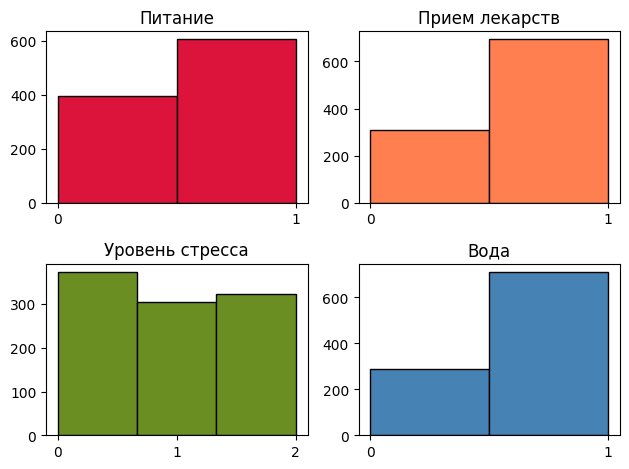

In [7]:
plt.subplot(2, 2, 1)
plt.hist(df['diet'], bins=2, color='#DC143C', edgecolor='k')
plt.title('Питание')
plt.xticks([0, 1])

plt.subplot(2, 2, 2)
plt.hist(df['med'], bins=2, color='#FF7F50', edgecolor='k')
plt.title('Прием лекарств')
plt.xticks([0, 1])

plt.subplot(2, 2, 3)
plt.hist(df['stress'], bins=3, color='#6B8E23', edgecolor='k')
plt.title('Уровень стресса')
plt.xticks([0, 1, 2])

plt.subplot(2, 2, 4)
plt.hist(df['water'], bins=2, color='#4682B4', edgecolor='k')
plt.title('Вода')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

Ящик с усами

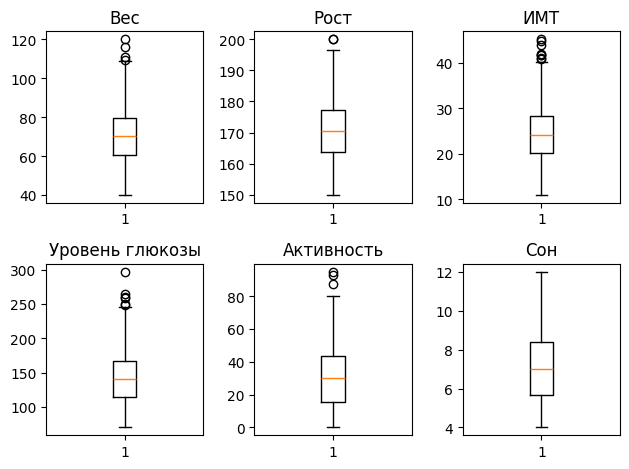

In [8]:
columns = ['weight', 'height', 'bmi', 'glucose', 'sport', 'sleep']
titles = ['Вес', 'Рост', 'ИМТ', 'Уровень глюкозы', 'Активность', 'Сон']


for i, (col, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(title)

plt.tight_layout()
plt.show()

### Корреляция различных признаков

Вес, рост, ИМТ

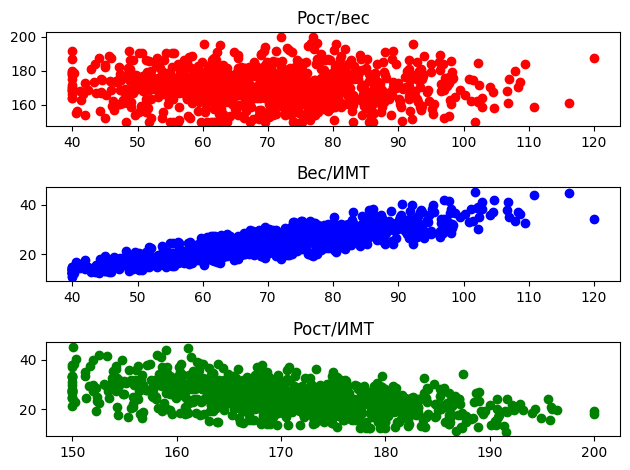

In [9]:
plt.subplot(3, 1, 1)
plt.scatter(df['weight'], df['height'], color='red')
plt.title('Рост/вес')

plt.subplot(3, 1, 2)
plt.scatter(df['weight'], df['bmi'], color='blue')
plt.title('Вес/ИМТ')

plt.subplot(3, 1, 3)
plt.scatter(df['height'], df['bmi'], color='green')
plt.title('Рост/ИМТ')

plt.tight_layout()
plt.show()

Активность, ИМТ

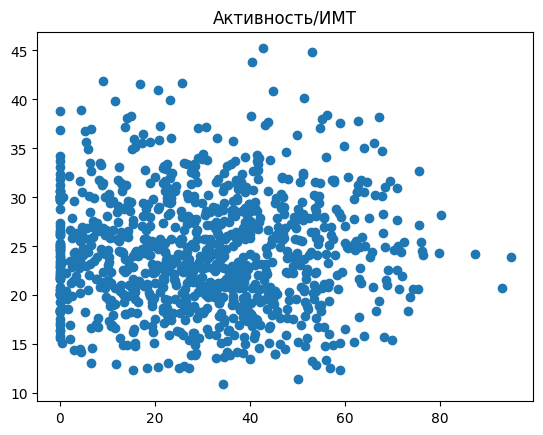

In [10]:
plt.scatter(df['sport'], df['bmi'])
plt.title('Активность/ИМТ')
plt.show()

In [11]:
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', None)
df[df['sport'] == 0]

,user_id,date,weight,height,glucose,sport,diet,med,stress,sleep,water,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.0,1,0,1,6.342317,1,22.9,38.000000
7,8,2021-01-08,81.511521,176.351718,107.316455,0.0,1,1,0,6.292043,1,26.2,33.000000
16,17,2021-01-18,54.807533,163.485820,129.419406,0.0,1,1,2,5.808119,0,20.5,38.000000
17,18,2021-01-19,74.713710,165.161142,70.000000,0.0,0,0,0,6.854830,1,27.4,58.000000
24,25,2021-01-27,61.834259,187.275432,70.000000,0.0,1,0,2,9.404697,1,17.6,58.000000
30,31,2021-02-02,60.974401,167.426235,172.284904,0.0,1,1,2,7.870630,1,21.8,28.000000
45,46,2021-02-19,59.202337,178.836599,184.841227,0.0,1,1,2,4.923819,1,18.5,34.008589
64,65,2021-03-12,82.187887,166.375591,150.614494,0.0,1,1,0,6.041428,1,29.7,33.000000
82,83,2021-03-31,92.168411,166.783649,82.245807,0.0,1,0,1,5.030244,1,33.1,68.000000
88,89,2021-04-07,62.053597,167.409579,121.870064,0.0,1,0,1,4.096233,1,22.1,43.000000


### Тепловая карта

Удаление лишних столбцов

In [12]:
df.drop(columns=['date', 'user_id'], inplace=True)
df

,weight,height,glucose,sport,diet,med,stress,sleep,water,bmi,risk_score
0,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234
5,66.487946,173.934854,148.531748,3.290369,0,1,0,7.901651,0,22.0,32.012889
6,93.688192,178.951932,140.048219,39.720726,1,1,2,8.673952,1,29.3,30.069819
7,81.511521,176.351718,107.316455,0.000000,1,1,0,6.292043,1,26.2,33.000000
8,62.957884,180.495527,166.369827,51.653821,0,1,0,8.419547,1,19.3,12.086545
9,78.138401,164.647648,177.502806,20.577507,0,1,1,12.000000,1,28.8,46.826748


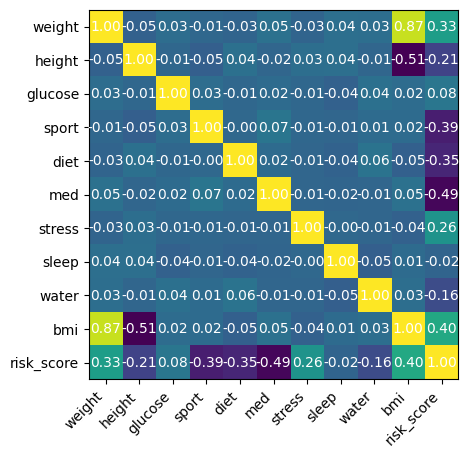

In [13]:
#   Матрица корреляции
corr_matrix = df.corr()

#   Тепловая карта
plt.imshow(corr_matrix)

labels = corr_matrix.columns
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)), labels)

for (i, j), val in np.ndenumerate(df.corr()):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center',
             color='white')

plt.show()

Корреляция уровня риска и ИМТ

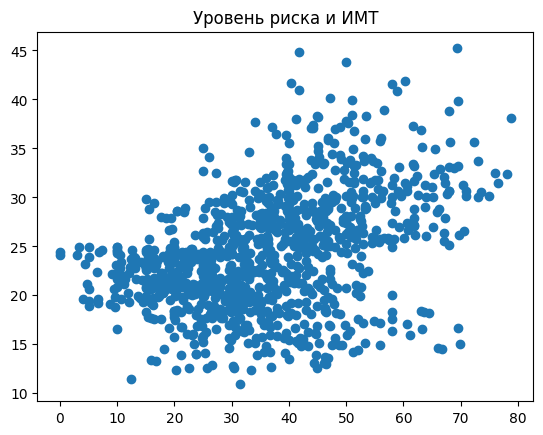

In [14]:
plt.scatter(df['risk_score'], df['bmi'])
plt.title('Уровень риска и ИМТ')
plt.show()

## Проектирование моделей

Импорт необходимых библиотек для обучения

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, svm, neighbors, naive_bayes, linear_model, \
                    discriminant_analysis
from sklearn.metrics import accuracy_score, f1_score
import time

Отделение целевой переменной от признаков

In [16]:
X = df.copy()
X.drop(['risk_score'], axis = 1, inplace = True)
Y = df['risk_score']

Преобразование целевой переменной в три категории для классификации:

0 - низкий уровень (до 30%), 1- средний (30-60%), 2 - высокий (более 60%)

In [17]:
bins = [-float('inf'), 30, 60, float('inf')]
labels = [0, 1, 2]

Y = pd.cut(Y, bins=bins, labels=labels)
Y = Y.astype(int)




Разделение данных на тестовую и обучающую выборки

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

### Обучение моделей

Словарь моделей

In [19]:
models = {
    'Дерево решений': tree.DecisionTreeClassifier(max_depth=3),
    'Метод опорных векторов': svm.SVC(probability=True),
    'К Ближайших соседей': neighbors.KNeighborsClassifier(),
    'Наивный Байес': naive_bayes.GaussianNB(),
    'Логистическая регрессия':
      linear_model.LogisticRegression(solver='newton-cg', max_iter=1000),
    'Линейный дискриминантный анализ':
      discriminant_analysis.LinearDiscriminantAnalysis(),
    'Квадратичный дискриминантный анализ':
      discriminant_analysis.QuadraticDiscriminantAnalysis()
}

Обучение базовых моделей и замер эффективности

In [20]:
#   Список для записи результатов
result_models = []

#   Обучение каждой модели
for model_name, model in models.items():

  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  accuracy = cv_scores.mean()

  #   Запись в список результатов
  result_models.append({
      'Model': model_name,
      'Accuracy CV': accuracy,
      })


pd.DataFrame(result_models)



,Model,Accuracy CV
0,Дерево решений,0.76500
1,Метод опорных векторов,0.62375
2,К Ближайших соседей,0.62625
3,Наивный Байес,0.80625
4,Логистическая регрессия,0.80375
5,Линейный дискриминантный анализ,0.80125
6,Квадратичный дискриминантный анализ,0.80375


Замер времени моделей

In [21]:
result_time = []

for model_name, model in models.items():

  on_time = time.time()
  model.fit(X_train, y_train)
  off_time = time.time()

  time_score = off_time - on_time
  result_time.append({
      'Model': model_name,
      'Time': time_score
      })

pd.DataFrame(result_time)


,Model,Time
0,Дерево решений,0.005925
1,Метод опорных векторов,0.138174
2,К Ближайших соседей,0.003146
3,Наивный Байес,0.002776
4,Логистическая регрессия,0.175857
5,Линейный дискриминантный анализ,0.003499
6,Квадратичный дискриминантный анализ,0.002766


In [22]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier


Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = []


for i in range(20):
  rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
  rf_accuracy = rf_scores.mean()

  start_time = time.time()
  rf.fit(X_train, y_train)
  end_time = time.time()

  rf_timecheck =  end_time - start_time

  rf_results.append({
      'Accuracy': rf_accuracy,
      'Time': rf_timecheck,
      })


rf_df = pd.DataFrame(rf_results)
rf_df


,Accuracy,Time
0,0.85375,0.306531
1,0.85375,0.292034
2,0.85375,0.306035
3,0.85375,0.451568
4,0.85375,0.287973
5,0.85375,0.286793
6,0.85375,0.301009
7,0.85375,0.293070
8,0.85375,0.297966
9,0.85375,0.292120


Голосование по 4 лучшим моделям

In [24]:
estimators = [
    ('Дерево решений', tree.DecisionTreeClassifier()),
    ('Наивный Байес', naive_bayes.GaussianNB()),
    ('Линейный дискриминантный анализ',
     discriminant_analysis.LinearDiscriminantAnalysis()),
    ('Квадратичный дискриминантный анализ',
     discriminant_analysis.QuadraticDiscriminantAnalysis())
    ]

vote_results=[]

for i in range(20):
  vote = VotingClassifier(estimators=estimators, voting='soft')

  vote_scores = cross_val_score(vote, X_train, y_train, cv=5)
  vote_accuracy = vote_scores.mean()

  vote_time_on = time.time()
  vote.fit(X_train, y_train)
  vote_time_off = time.time()

  vote_timecheck = vote_time_off - vote_time_on

  vote_results.append({
      'Accuracy': vote_accuracy,
      'Time': vote_timecheck,
      })

vote_df = pd.DataFrame(vote_results)
vote_df

,Accuracy,Time
0,0.84375,0.019007
1,0.83500,0.018897
2,0.83750,0.017224
3,0.84125,0.017015
4,0.84250,0.019657
5,0.84625,0.018465
6,0.84125,0.019844
7,0.84875,0.016847
8,0.84125,0.017203
9,0.84375,0.017629


In [25]:
stack = StackingClassifier(estimators=estimators)


stack_results=[]

for i in range(20):
  stack_scores = cross_val_score(vote, X_train, y_train, cv=5)
  stack_accuracy = stack_scores.mean()

  stack_time_on = time.time()
  stack.fit(X_train, y_train)
  stack_time_off = time.time()

  stack_timecheck = stack_time_off - stack_time_on
  stack_results.append({
      'Accuracy': stack_accuracy,
      'Time': stack_timecheck,
      })


stack_df = pd.DataFrame(stack_results)
stack_df

,Accuracy,Time
0,0.84375,0.171930
1,0.84500,0.156376
2,0.84125,0.161107
3,0.84500,0.163516
4,0.83875,0.175951
5,0.84125,0.162293
6,0.84375,0.155116
7,0.84000,0.162805
8,0.84375,0.165785
9,0.84375,0.170977


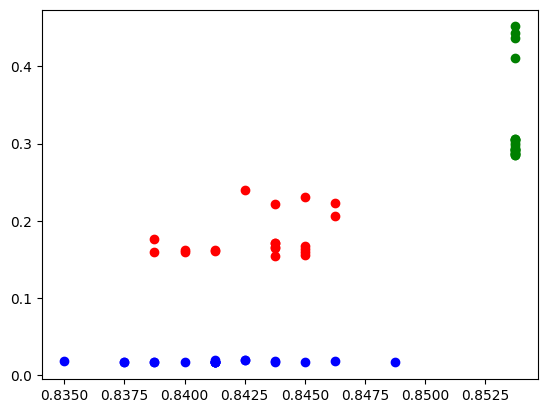

In [26]:
plt.scatter(stack_df['Accuracy'], stack_df['Time'], color='red')
plt.scatter(vote_df['Accuracy'], vote_df['Time'], color='blue')
plt.scatter(rf_df['Accuracy'], rf_df['Time'], color='green')
plt.show()

### Стекинг

In [27]:
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=discriminant_analysis.LinearDiscriminantAnalysis())

stack_scores = cross_val_score(stack, X_train, y_train, cv=5)
stack_accuracy = stack_scores.mean()
stack_std = stack_scores.std()

stack.fit(X_train, y_train)

y_test_pred = stack.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Кросс-валидация - Средняя точность: {stack_accuracy:.4f} ± {stack_std:.4f}')
print(f'Тестовый набор - Точность: {test_accuracy:.4f}')
print(f'Тестовый набор - F1-Score: {test_f1:.4f}')

Кросс-валидация - Средняя точность: 0.8450 ± 0.0232
Тестовый набор - Точность: 0.8400
Тестовый набор - F1-Score: 0.8407


Матрица ошибок

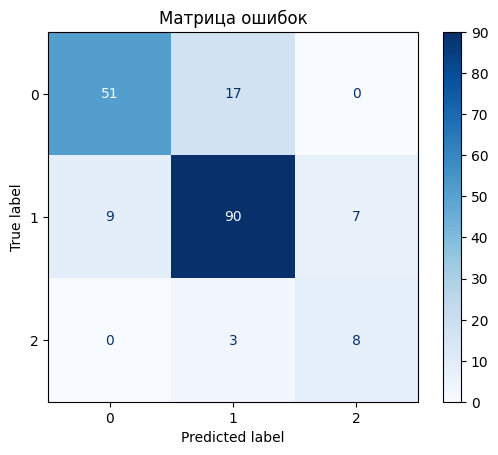

array([[51, 17,  0],
       [ 9, 90,  7],
       [ 0,  3,  8]])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()

cm

In [60]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        68
           1       0.82      0.85      0.83       106
           2       0.53      0.73      0.62        11

    accuracy                           0.81       185
   macro avg       0.73      0.78      0.75       185
weighted avg       0.81      0.81      0.81       185



#### Улучшенный стекинг

Список моделей

In [28]:
estimators = [
    ('tree', tree.DecisionTreeClassifier()),
    ('bayes', naive_bayes.GaussianNB()),
    ('lda',
     discriminant_analysis.LinearDiscriminantAnalysis()),
    ('qda',
     discriminant_analysis.QuadraticDiscriminantAnalysis())
    ]

Гиперпараметры

In [29]:
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [None, 5, 10],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'qda__reg_param': [0.0, 0.1, 0.5, 1.0],
}


Поиск гиперпараметров

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
stack_2 = StackingClassifier(
    estimators=estimators,
    final_estimator=discriminant_analysis.LinearDiscriminantAnalysis())

grid_search = GridSearchCV(estimator=stack_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший скор: ", grid_search.best_score_)

Лучшие параметры:  {'lda__solver': 'lsqr', 'qda__reg_param': 0.1, 'tree__criterion': 'entropy', 'tree__max_depth': 10}
Лучший скор:  0.8537500000000001


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [46]:
best_models = [
    ('tree', tree.DecisionTreeClassifier(max_depth=10, criterion='gini')),
    ('bayes', naive_bayes.GaussianNB()),
    ('lda',
     discriminant_analysis.LinearDiscriminantAnalysis(solver='eigen')),
    ('qda',
     discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param=0.5))
    ]

In [47]:
stack = StackingClassifier(
    estimators=best_models,
    final_estimator=discriminant_analysis.LinearDiscriminantAnalysis())

stack_scores = cross_val_score(stack, X_train, y_train, cv=5)
stack_accuracy = stack_scores.mean()
stack_std = stack_scores.std()

stack.fit(X_train, y_train)

y_test_pred = stack.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Кросс-валидация - Средняя точность: {stack_accuracy:.4f} ± {stack_std:.4f}')
print(f'Тестовый набор - Точность: {test_accuracy:.4f}')
print(f'Тестовый набор - F1-Score: {test_f1:.4f}')

Кросс-валидация - Средняя точность: 0.8412 ± 0.0196
Тестовый набор - Точность: 0.8250
Тестовый набор - F1-Score: 0.8249


In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

In [36]:
selector = SelectKBest(score_func=f_classif, k=7)

X_train_2 = selector.fit_transform(X_train, y_train)
X_test_2 = selector.transform(X_test)


In [37]:
stack = StackingClassifier(
    estimators=best_models,
    final_estimator=discriminant_analysis.LinearDiscriminantAnalysis())

stack_scores = cross_val_score(stack, X_train_2, y_train, cv=5)
stack_accuracy = stack_scores.mean()
stack_std = stack_scores.std()

stack.fit(X_train_2, y_train)

y_test_pred = stack.predict(X_test_2)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Кросс-валидация - Средняя точность: {stack_accuracy:.4f} ± {stack_std:.4f}')
print(f'Тестовый набор - Точность: {test_accuracy:.4f}')
print(f'Тестовый набор - F1-Score: {test_f1:.4f}')

Кросс-валидация - Средняя точность: 0.8238 ± 0.0133
Тестовый набор - Точность: 0.8450
Тестовый набор - F1-Score: 0.8452


Удаление нулевых значений физической активности

In [42]:
df_mod_sport = df[df['sport'] != 0]
df_mod_sport.shape

(924, 11)

Разбиение нового датасета на обучающую и тестовую выборки

In [53]:
X_2 = df_mod_sport.copy()
X_2.drop(['risk_score'], axis = 1, inplace = True)
Y_2 = df_mod_sport['risk_score']

bins = [-float('inf'), 30, 60, float('inf')]
labels = [0, 1, 2]

Y_2 = pd.cut(Y_2, bins=bins, labels=labels)
Y_2 = Y_2.astype(int)

Тренировка на новом наборе

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.2, stratify=Y_2, random_state=42)

stack = StackingClassifier(
    estimators=best_models,
    final_estimator=discriminant_analysis.LinearDiscriminantAnalysis())

stack_scores = cross_val_score(stack, X_train, y_train, cv=5)
stack_accuracy = stack_scores.mean()
stack_std = stack_scores.std()

stack.fit(X_train, y_train)

y_test_pred = stack.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Кросс-валидация - Средняя точность: {stack_accuracy:.4f} ± {stack_std:.4f}')
print(f'Тестовый набор - Точность: {test_accuracy:.4f}')
print(f'Тестовый набор - F1-Score: {test_f1:.4f}')

Кросс-валидация - Средняя точность: 0.8349 ± 0.0258
Тестовый набор - Точность: 0.8054
Тестовый набор - F1-Score: 0.8070
